## Coding Exercises

#### Import packages / libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload the file
best = pd.read_csv('bestsellers.csv')

best

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction,Non Fiction
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction,Fiction
...,...,...,...,...,...,...,...,...
370,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760.0,15.0,2012.0,Fiction,Fiction
371,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302.0,11.0,2010.0,Non Fiction,Non Fiction
372,Wonder,R. J. Palacio,4.8,21625.0,9.0,2017.0,Fiction,Fiction
373,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413.0,8.0,2019.0,Fiction,Fiction


#### Investigate / view the data frame

In [3]:
best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         347 non-null    object 
 1   Author       347 non-null    object 
 2   User Rating  347 non-null    float64
 3   Reviews      347 non-null    float64
 4   Price        347 non-null    float64
 5   Year         347 non-null    float64
 6   Genre        347 non-null    object 
 7   Type         347 non-null    object 
dtypes: float64(4), object(4)
memory usage: 23.6+ KB


No anomalies in data types of the file

### Data Cleaning

In [4]:
best.isnull().sum()

Name           28
Author         28
User Rating    28
Reviews        28
Price          28
Year           28
Genre          28
Type           28
dtype: int64

In [5]:
best[best['Name'].isna()] #display nulls

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# remove nulls
best = best.dropna()
best.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Type           0
dtype: int64

## Data Analysis

#### 1. Are the number of reviews increasing each year?
#### 2. Which book received the most number of reviews?

#### Q1. Are the number of reviews increasing each year?

In [7]:
best.groupby('Year')['Reviews'].sum()

Year
2009.0    205181.0
2010.0    208384.0
2011.0    145906.0
2012.0    326838.0
2013.0    372387.0
2014.0    309002.0
2015.0    345897.0
2016.0    271969.0
2017.0    273327.0
2018.0    454441.0
2019.0    455925.0
Name: Reviews, dtype: float64

In [11]:
b = best.groupby('Year', as_index = False).agg({'Reviews': 'sum'})

b

,Year,Reviews
0,2009.0,205181.0
1,2010.0,208384.0
2,2011.0,145906.0
3,2012.0,326838.0
4,2013.0,372387.0
5,2014.0,309002.0
6,2015.0,345897.0
7,2016.0,271969.0
8,2017.0,273327.0
9,2018.0,454441.0


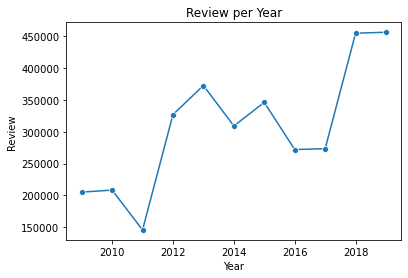

In [15]:
sns.lineplot(x='Year', y='Reviews', data = b, marker= 'o')
plt.xlabel('Year')
plt.ylabel('Review')
plt.title('Review per Year')
plt.show()

#### Ans. The number of reviews each year increases as of 2019. During 2011 and 2014 theres a sudden change in number of reviews.

In [8]:
best.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350.0,8.0,2016.0,Non Fiction,Non Fiction
2,11/22/63: A Novel,Stephen King,4.6,2052.0,22.0,2011.0,Fiction,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979.0,15.0,2018.0,Non Fiction,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424.0,6.0,2017.0,Fiction,Fiction
5,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665.0,12.0,2019.0,Non Fiction,Non Fiction


### Q2. Which book received the most number of reviews?

In [9]:
best = best.sort_values(by = 'Reviews', ascending = False)

best.head(1)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Type
366,Where the Crawdads Sing,Delia Owens,4.8,87841.0,15.0,2019.0,Fiction,Fiction


### Ans. The book that received the most number of reviews is 'Where the Crawdads Sing' by Delia Owens. This book received 87841 reviews in 2019 with user rating of 2.9.

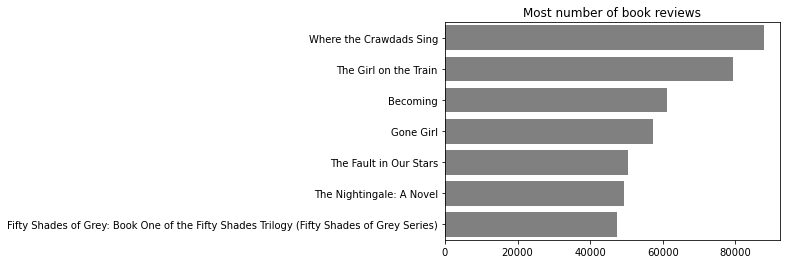

In [16]:
p_top = best[(best['Reviews']>=40000)]

sns.barplot(y="Name", x="Reviews", data=p_top, ci = False, orient = 'h', color = 'grey')
plt.title('Most number of book reviews')
plt.ylabel('')
plt.xlabel('')
plt.show()